In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Assorted 
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv('Crime_Data_2019_Neighborhoods_v2.csv')
df = df[df['LAT'] != 0]
df = df[df['LON'] != 0]

C:\Users\Matheus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df

,DR_NO,DATE OCC,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON,Neighborhood
0,191907191,2019-03-08,510.0,NaN,NaN,NaN,34.2991,-118.4211,Sylmar
1,190125334,2019-10-17,330.0,NaN,NaN,NaN,34.0363,-118.2314,Downtown Los Angeles
2,191920961,2019-12-22,510.0,NaN,NaN,NaN,34.2283,-118.4611,North Hills East
3,190604395,2019-01-09,510.0,NaN,NaN,NaN,34.0944,-118.3180,Central LA
4,191310615,2019-04-30,510.0,NaN,NaN,NaN,33.9930,-118.2411,South Los Angeles
...,...,...,...,...,...,...,...,...,...
216097,190608903,2019-03-28,648.0,NaN,NaN,NaN,34.0962,-118.3490,NaN
216098,190715222,2019-08-14,331.0,NaN,NaN,NaN,34.0871,-118.3732,NaN
216099,192004409,2019-01-06,930.0,NaN,NaN,NaN,34.0637,-118.2870,NaN
216100,191716777,2019-10-16,420.0,NaN,NaN,NaN,34.2266,-118.5085,NaN


In [4]:
df_filled = df[df['Neighborhood'].notnull()]
df_filled_sampled_1 = df[df['Neighborhood'].notnull()].sample(30000)
df_filled_sampled_2 = df[df['Neighborhood'].notnull()].sample(30000)
df_empty = df[df['Neighborhood'].isnull()]

In [5]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_jobs=-2)

In [6]:
# Split X and Y
x_train = df_filled_sampled_1[['LAT', 'LON']]
y_train = df_filled_sampled_1[['Neighborhood']].values.reshape(-1)

x_test = df_filled_sampled_2[['LAT', 'LON']]
y_test = df_filled_sampled_2[['Neighborhood']].values.reshape(-1)

In [7]:
# Fit
KNN.fit(X=x_train, y=y_train)

KNeighborsClassifier(n_jobs=-2)

In [8]:
# Train accuracy
KNN.score(X=x_train, y=y_train)

0.9771333333333333

In [9]:
# Test accuracy
KNN.score(X=x_test, y=y_test)

0.9670666666666666

In [10]:
# Train on the whole of df_filled to predict all of df_empty

# Split X and Y
x_train = df_filled[['LAT', 'LON']]
y_train = df_filled[['Neighborhood']].values.reshape(-1)

x_pred = df_empty[['LAT', 'LON']]

# Fit
KNN.fit(X=x_train, y=y_train)

# Predict
pred_labels = KNN.predict(x_pred)

In [11]:
df_empty['Neighborhood'] = pred_labels

C:\Users\Matheus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df_empty.head()

,DR_NO,DATE OCC,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON,Neighborhood
54,190814539,2019-08-18,440.0,NaN,NaN,NaN,34.1171,-118.4298,Beverly Glen
92,201606540,2019-12-20,440.0,NaN,NaN,NaN,34.2107,-118.3435,Sun Valley
109,191412449,2019-05-16,331.0,NaN,NaN,NaN,34.0006,-118.4085,McLaughlin
111,191404073,2019-01-01,930.0,NaN,NaN,NaN,33.9923,-118.4284,Mar Vista
114,191106297,2019-02-16,330.0,NaN,NaN,NaN,34.1183,-118.2942,Central LA


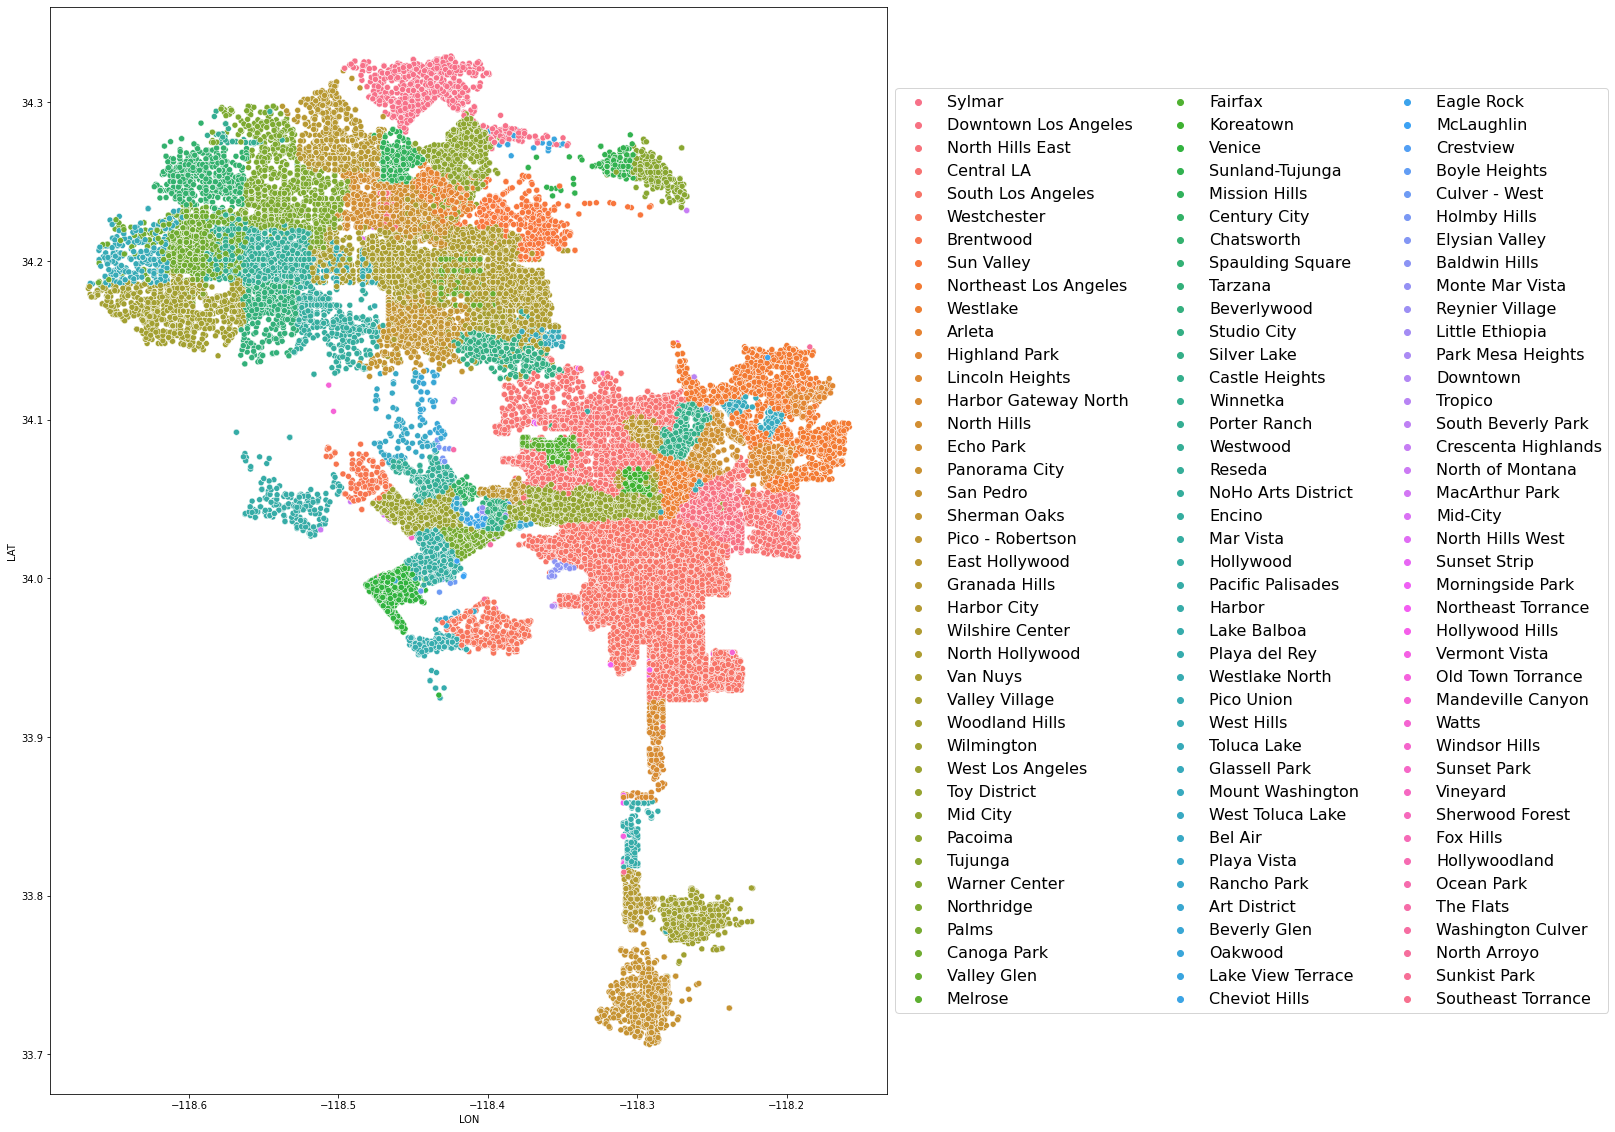

In [13]:
# Plot df_filled
fig, ax = plt.subplots(figsize=(15, 20))
g = sns.scatterplot(x=df_filled['LON'], y=df_filled['LAT'], hue=df_filled['Neighborhood'])
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', ncol=3, fontsize=16)
plt.show()

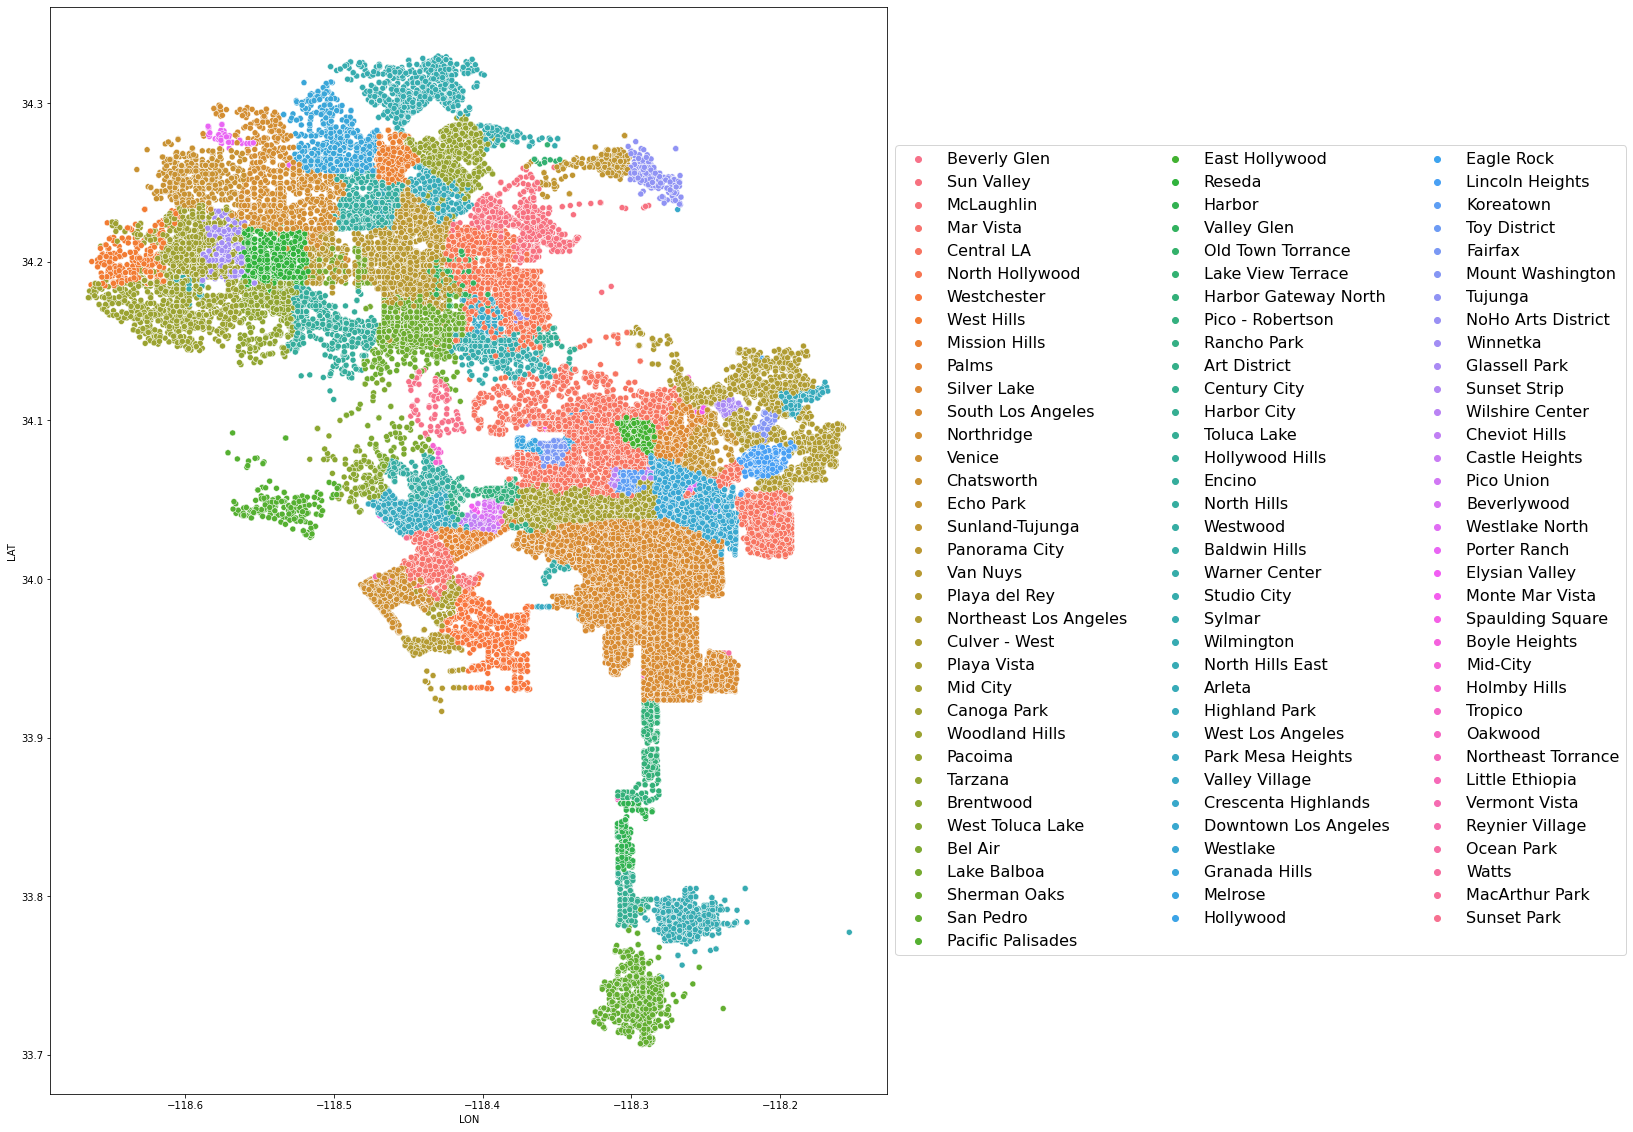

In [14]:
# Plot df_empty after predictions
fig, ax = plt.subplots(figsize=(15, 20))
g = sns.scatterplot(x=df_empty['LON'], y=df_empty['LAT'], hue=df_empty['Neighborhood'])
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', ncol=3, fontsize=16)
plt.show()

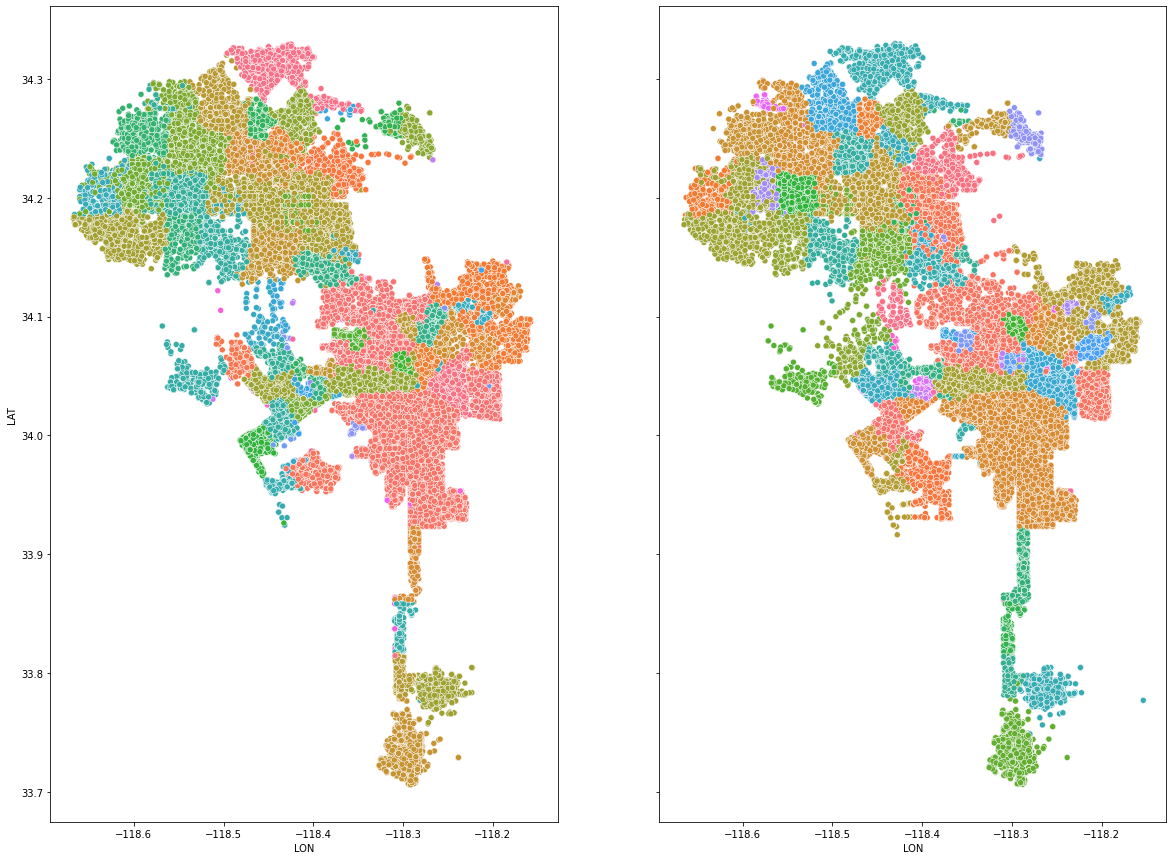

In [15]:
# Compare plots
fig, ax = plt.subplots(ncols=2, figsize=(20, 15), sharey=True, sharex=True)
g0 = sns.scatterplot(x=df_filled['LON'], y=df_filled['LAT'], hue=df_filled['Neighborhood'], ax=ax[0], legend=None)
g1 = sns.scatterplot(x=df_empty['LON'], y=df_empty['LAT'], hue=df_empty['Neighborhood'], ax=ax[1], legend=None)
plt.show()

It works!

In [16]:
df_final = pd.concat([df_filled, df_empty])

In [17]:
df_final

,DR_NO,DATE OCC,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON,Neighborhood
0,191907191,2019-03-08,510.0,NaN,NaN,NaN,34.2991,-118.4211,Sylmar
1,190125334,2019-10-17,330.0,NaN,NaN,NaN,34.0363,-118.2314,Downtown Los Angeles
2,191920961,2019-12-22,510.0,NaN,NaN,NaN,34.2283,-118.4611,North Hills East
3,190604395,2019-01-09,510.0,NaN,NaN,NaN,34.0944,-118.3180,Central LA
4,191310615,2019-04-30,510.0,NaN,NaN,NaN,33.9930,-118.2411,South Los Angeles
...,...,...,...,...,...,...,...,...,...
216097,190608903,2019-03-28,648.0,NaN,NaN,NaN,34.0962,-118.3490,Central LA
216098,190715222,2019-08-14,331.0,NaN,NaN,NaN,34.0871,-118.3732,Melrose
216099,192004409,2019-01-06,930.0,NaN,NaN,NaN,34.0637,-118.2870,Wilshire Center
216100,191716777,2019-10-16,420.0,NaN,NaN,NaN,34.2266,-118.5085,Northridge


In [18]:
# Save CSV
df_final.to_csv('Crime_Data_2019_Neighborhoods_v3.csv', index=False)